<a href="https://colab.research.google.com/github/Atfssene/FRASA/blob/main/IndoSum_EDA_FRASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IndoSum Dataset EDA**
**Potato Tech** team build an app that named **Frasa** for capstone project. So we will build machine learning model for Frasa to predict a summary from a sentences.

In this lab, we will do exploratory data analysis and preprocess the dataset.
The dataset is consists of news articles and manually constructed summaries [IndoSum dataset](https://drive.google.com/file/d/1OgYbPfXFAv3TbwP1Qcwt_CC9cVWSJaco/view) from [Kurniawan, Kemal & Louvan, Samuel (2018)](https://arxiv.org/abs/1810.05334).

Let's start!

## Preparation

In [1]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 8.0MB/s 


In [2]:
# Import library
import pandas as pd
import json
import matplotlib.pyplot as plt
import nltk
import re

nltk.download('punkt')

from nltk.tokenize import sent_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize.treebank import TreebankWordDetokenizer as untoken


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Load data

In [3]:
# Download and extract the dataset
!gdown --id 1OgYbPfXFAv3TbwP1Qcwt_CC9cVWSJaco
!tar -xvf /content/indosum.tar.gz

Downloading...
From: https://drive.google.com/uc?id=1OgYbPfXFAv3TbwP1Qcwt_CC9cVWSJaco
To: /content/indosum.tar.gz
96.0MB [00:03, 30.1MB/s]
indosum/
indosum/test.02.jsonl
indosum/README.txt
indosum/train.05.jsonl
indosum/train.04.jsonl
indosum/test.04.jsonl
indosum/train.01.jsonl
indosum/test.05.jsonl
indosum/test.03.jsonl
indosum/test.01.jsonl
indosum/dev.04.jsonl
indosum/dev.01.jsonl
indosum/dev.02.jsonl
indosum/train.02.jsonl
indosum/dev.03.jsonl
indosum/dev.05.jsonl
indosum/CHANGELOG.txt
indosum/train.03.jsonl


In [4]:
# We will use the first-fold data (train, dev, test)
files=['/content/indosum/train.01.jsonl',
       '/content/indosum/dev.01.jsonl',
       '/content/indosum/test.01.jsonl']

with open(files[0], 'r') as f, open(files[1], 'r') as ft, open(files[2], 'r') as ftest:
  data_train = f.readlines()
  data_train = list(map(json.loads, data_train))
  data_dev = ft.readlines()
  data_dev = list(map(json.loads, data_dev))
  df1 = pd.DataFrame(data_train)
  df2 = pd.DataFrame(data_dev)

  data_test = ftest.readlines()
  data_test = list(map(json.loads, data_test))

test = pd.DataFrame(data_test)
train = pd.concat([df1, df2])


## Exploratoratory

In [5]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 0 to 749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     15012 non-null  object
 1   gold_labels  15012 non-null  object
 2   id           15012 non-null  object
 3   paragraphs   15012 non-null  object
 4   source       15012 non-null  object
 5   source_url   15012 non-null  object
 6   summary      15012 non-null  object
dtypes: object(7)
memory usage: 938.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     3762 non-null   object
 1   gold_labels  3762 non-null   object
 2   id           3762 non-null   object
 3   paragraphs   3762 non-null   object
 4   source       3762 non-null   object
 5   source_url   3762 non-null   object
 6   summary      3762 non-null   object
dty

Now we know the dataset consist of 7 columns and probably we will just take some of the column that related to this summarization work.

To make we sure what columns should we choose, let's take a look at some rows.

In [6]:
train.head()

,category,gold_labels,id,paragraphs,source,source_url,summary
0,tajuk utama,"[[False, True], [True, True], [False, False, F...",1501893029-lula-kamal-dokter-ryan-thamrin-saki...,"[[[Jakarta, ,, CNN, Indonesia, -, -, Dokter, R...",cnn indonesia,https://www.cnnindonesia.com/hiburan/201708041...,"[[Dokter, Lula, Kamal, yang, merupakan, selebr..."
1,teknologi,"[[False, False, False, False], [False, True, T...",1509072914-dua-smartphone-zenfone-baru-tawarka...,"[[[Selfie, ialah, salah, satu, tema, terpanas,...",dailysocial.id,https://dailysocial.id/post/dua-smartphone-zen...,"[[Asus, memperkenalkan, , ZenFone, generasi, ..."
2,hiburan,"[[True], [True], [False, False], [False], [Fal...",1510613677-songsong-visit-2020-bengkulu-perkua...,"[[[Jakarta, ,, CNN, Indonesia, -, -, Dinas, Pa...",cnn indonesia,https://www.cnnindonesia.com/gaya-hidup/201711...,"[[Dinas, Pariwisata, Provinsi, Bengkulu, kemba..."
3,tajuk utama,"[[True, True], [False, False, False], [True], ...",1502706803-icw-ada-kejanggalan-atas-tewasnya-s...,"[[[Merdeka.com, -, Indonesia, Corruption, Watc...",merdeka,https://www.merdeka.com/peristiwa/icw-merasa-a...,"[[Indonesia, Corruption, Watch, (, ICW, ), mem..."
4,tajuk utama,"[[False, True], [True, True, True], [False], [...",1503039338-pembagian-sepeda-usai-upacara-penur...,"[[[Merdeka.com, -, Presiden, Joko, Widodo, (, ...",merdeka,https://www.merdeka.com/peristiwa/usai-upacara...,"[[Jokowi, memimpin, upacara, penurunan, bender..."


From here, we can see our raw data have:

1. Tokenized text in paragraphs and summary.
2. Punctuation wasn't cleaned.
3. Lowercase and uppercase letters.
3. Column gold_labels is a boolean list of main idea sentences in paragraphs (for extractive summarization)
4. This dataset had 7 columns and 15012 rows.

For next, the columns will be used are **gold_labels, paragraphs**, and **summary**.


## Preprocessing #1

We will flatten that three columns as instead tokenized string/listed because our predict input later could be raw string.

In [7]:
def untokenizer(dataframe_row, axis):
  text_list = []
  for data in dataframe_row:
    string = ""
    if axis == 0:
      for t in data:
        for text in t:
          string = string + untoken().detokenize(text) + " "
    elif axis == 1:
      for text in data:
          string = string + untoken().detokenize(text) + " "
    else:
      string =  [y for x in data for y in x]

    text_list.append(string)
  return text_list

In [8]:
train['clean_paragraphs'] = untokenizer(train['paragraphs'], 0)
train['clean_summary'] = untokenizer(train['summary'], 1)
train['labels'] = untokenizer(train['gold_labels'], 2)

test['clean_paragraphs'] = untokenizer(test['paragraphs'], 0)
test['clean_summary'] = untokenizer(test['summary'], 1)
test['labels'] = untokenizer(test['gold_labels'], 2)

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 0 to 749
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          15012 non-null  object
 1   gold_labels       15012 non-null  object
 2   id                15012 non-null  object
 3   paragraphs        15012 non-null  object
 4   source            15012 non-null  object
 5   source_url        15012 non-null  object
 6   summary           15012 non-null  object
 7   clean_paragraphs  15012 non-null  object
 8   clean_summary     15012 non-null  object
 9   labels            15012 non-null  object
dtypes: object(10)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          3762 non-null   object
 1   gold_labels       3762 non-null   object
 2   id  

In [10]:
columns = ['labels','clean_paragraphs', 'clean_summary']
train[columns].head(2)

labels  \
0                                                                                                                                                            [False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]   
1  [False, False, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

That's better! Before continue to saving preprocessed data, let's check if it have empty value or duplicate value.

In [11]:
train.isnull().any()


category            False
gold_labels         False
id                  False
paragraphs          False
source              False
source_url          False
summary             False
clean_paragraphs    False
clean_summary       False
labels              False
dtype: bool

In [12]:
test.isnull().any()

category            False
gold_labels         False
id                  False
paragraphs          False
source              False
source_url          False
summary             False
clean_paragraphs    False
clean_summary       False
labels              False
dtype: bool

In [13]:
train[train['clean_paragraphs'].duplicated()]

,category,gold_labels,id,paragraphs,source,source_url,summary,clean_paragraphs,clean_summary,labels


In [14]:
test[test['clean_paragraphs'].duplicated()]

,category,gold_labels,id,paragraphs,source,source_url,summary,clean_paragraphs,clean_summary,labels


Great!

No empty value and no duplicate value from **15012 rows** train data and **3762 rows** test data.
Let's explore again our data and create preprocessing.

### Sentences & Words

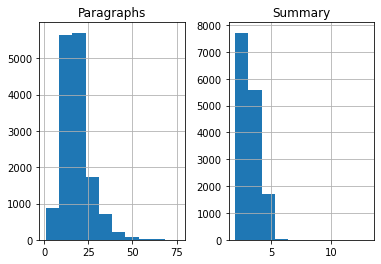

In [15]:
paragraphs_sentences = []
summary_sentences = []

# populate the lists with sentence lengths
for t in train['clean_paragraphs']:
      paragraphs_sentences.append(len(sent_tokenize(t)))

# populate the lists with sentence lengths
for t in train['clean_summary']:
      summary_sentences.append(len(sent_tokenize(t)))

sentences_hist = pd.DataFrame({'Paragraphs':paragraphs_sentences, 'Summary':summary_sentences})

sentences_hist.hist()
plt.show()

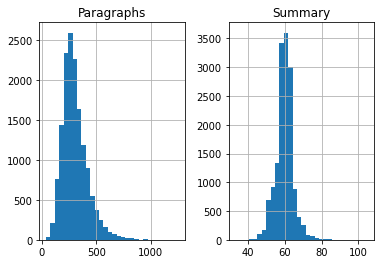

In [16]:
paragraphs_words = []
summary_words = []

# populate the lists with sentence lengths
for t in train['clean_paragraphs']:
      paragraphs_words.append(len(t.split()))

# populate the lists with sentence lengths
for t in train['clean_summary']:
      summary_words.append(len(t.split()))

words_hist = pd.DataFrame({'Paragraphs':paragraphs_words, 'Summary':summary_words})

words_hist.hist(bins=30)
plt.show()

So the number of sentences in the paragraph is around 15-20 sentences while the summary mostly have less than 5 sentences.

For words, paragraphs have about 250 words and summaries have 60 words.

## Preprocessing #2

Before saving the dataset, we will create one more column from clean_paragraphs. We'll call it preprocess_text and processing it again for later feature extraction with rules:
1. Splits paragraphs into sentences.
2. Lowercasing letter.
3. Remove punctuation.
4. Remove stopword.
5. Remove non alphanumerical letter.
6. Join sentences to one paragraph again

In [65]:
factory = StopWordRemoverFactory()
stop_words = factory.get_stop_words()

def preprocess_text(row):
  sentences = []
  processed = ""
  for row in sent_tokenize(row['clean_paragraphs']):
    sentences.append(sent_tokenize(row.lower()))
  sentences = [y for x in sentences for y in x]
  for i, text in enumerate(sentences):
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub(r"\b\w{1,3}\b"," ",text)
    text = " ".join([word for word in text.split() if not word in stop_words])
    processed = processed + text +". "
  return processed

In [66]:
train['preprocess_text'] = train.apply(lambda row: preprocess_text(row), axis=1)

In [67]:
train[['preprocess_text']].head(2)

,preprocess_text
0,jakarta indonesia dokter ryan thamrin terkenal lewat acara dokter indonesia meninggal dunia jumat dini hari. dokter lula kamal merupakan selebriti sekaligus rekan kerja ryan menyebut kawannya sakit sejak setahun lalu. lula menuturkan sakit membuat ryan mesti vakum semua kegiatannya termasuk menjadi pembawa acara dokter indonesia. kondisi membuat ryan kampung halamannya pekanbaru riau menjalani istirahat. setahu orangnya sehat tahun lalu dengar sakit. sakitnya langsung pulang pekanbaru jadi jenguk susah. barangkali istirahat betul kalau jakarta susah isirahatnya kata lula cnnindonesia jumat. lula mengenal ryan sejak aktif berkarier televisi mengaku sempat membesuk ryan lantaran lokasi jauh. tahu penyakit diderita ryan. enggak tahu sempat jenguk enggak selamanya dijenguk. enggak tahu berat sekali bagaimana tutur ryan. setahun menderita sakit lula mengetahui penyebab kematian indonesia. meski mendengar beberapa kabar menyebut penyebab ryan meninggal jatuh kamar mandi. tahu barangkali penyakit dulu sama sekarang berbeda penyebab kematiannya beda penyakit sebelumnya. enggak mengambil kesimpulan kata lula. ryan thamrin terkenal dokter rutin membagikan tips informasi kesehatan lewat tayangan dokter indonesia. ryan menempuh pendidikan dokter tahun fakultas kedokteran universitas gadjah mada. kemudian melanjutkan pendidikan klinis kesehatan reproduksi penyakit menular seksual mahachulalongkornrajavidyalaya university bangkok thailand.
1,selfie ialah salah satu tema terpanas kalangan produsen smartphone bahkan menjadi senjata andalan beberapa brand terkenal. mungkin berpikir pasar handset spesialis selfie sangat sesak. asus melihat adanya peluang besar menanti sana. data sebanyak persen orang indonesia mengambil selfie wefie minggu. mulai menyelami ranah swafoto tahun silam lewat zanfone selfie sang produsen hardware asal taiwan akhirnya membawa sepasang pewarisnya tanah. handset handset merupakan anggota keluarga zenfone generasi keempat keduanya sama sama dibekali setup kamera ganda depan. asus zenfone selfie zenfone selfie. asus jerry shen menjelaskan waktunya asus memberikan penawaran baru buat penggemar self portrait menunjukkan keseriusan segmen. walaupun tersedia banyak pilihan asus berpendapat konsumen indonesia membutuhkan solusi lebih profesional. zenfone selfie anyar kabarnya diracik sedemikian rupa jawaban atas kekurangan perangkat perangkat kompetitor khususnya aspek jangkauan lensa performa kondisi light. zenfone selfie merupakan produk swafoto pamungkas asus. tubuh berbahan aluminiumnya dibuat melalui teknik nano molding tiap lekukannya dibentuk presisi. dipadu layar berlapis corning gorilla glass akui penampilan handset sangat menawan terutama varian berwarna merahnya. jendela akses konten smartphone menghidangkan layar amoled berkepadatan seluas inci. atraksi utama zenfone selfie kamera depannya. sana asus mencantumkan sistem duopixel berisi kombinasi sepasang sensor sony exmor megapixel aperture ditambah sensor omnivision memiliki lensa wide angle derajat kamera merangkul objek kali lebih banyak memungkinkan selfie bersama kawan ataupun keluarga bantuan monopod. asus melengkapi zenfone selfie bundel perkakas khusus swafoto bernama selfiemaster. tool berisi fitur fitur krusial semisal beautify buat foto maupun video kolase beautylive. produsen lupa menyiapkan flash softlight membantu pengambilan foto kondisi temaram. kamera belakangnya sendiri mengandalkan sensor sony exmor megapixel berlensa. dibantu sistem electronic image stabilization phase detection autofocus dual tone flash. asus mempersenjatai chip qualcomm snapdragon prosesor octa core cortex adreno sebesar baterai. smartphone berjalan sistem operasi android nougat plus interface zenui. ialah alternatif lebih terjangkau saudarinya atas. handset mengusung arahan desain serupa zenfone selfie konstruksi tubuhnya terbuat plastik layar incinya menyajikan resolusi. jangan cemas soal penampilannya smartphone tetap memanfaatkan kaca memberi kesan meny

## Save Dataset to CSV

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          3762 non-null   object
 1   gold_labels       3762 non-null   object
 2   id                3762 non-null   object
 3   paragraphs        3762 non-null   object
 4   source            3762 non-null   object
 5   source_url        3762 non-null   object
 6   summary           3762 non-null   object
 7   clean_paragraphs  3762 non-null   object
 8   clean_summary     3762 non-null   object
 9   labels            3762 non-null   object
dtypes: object(10)
memory usage: 294.0+ KB


In [69]:
columns = ['labels','clean_paragraphs', 'clean_summary', 'preprocess_text']
header = ['labels','paragraphs', 'summary', 'clean_text']
train.to_csv('train.csv',
             columns=columns,
             header=header,
             index=False)
test.to_csv('test.csv',
            columns=columns[:3],
            header=header[:3],
            index=False)

In [70]:
from google.colab import files
files.download('test.csv') 
files.download('train.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Let's import the exported csv to make sure we had export it nicely.

In [73]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_train.info()
df_train.sample(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15012 entries, 0 to 15011
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   labels      15012 non-null  object
 1   paragraphs  15012 non-null  object
 2   summary     15012 non-null  object
 3   clean_text  15012 non-null  object
dtypes: object(4)
memory usage: 469.2+ KB


,labels,paragraphs,summary,clean_text
11570,"[True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]","Jakarta, CNN Indonesia - - PT Adhi Karya (Persero) Tbk resmi menandatangani kontrak proyek pembangunan kereta api jenis Light Rapid Transit (LRT) Jakarta - Bogor - Depok - Bekasi (Jabodebek) sepanjang 43 kilometer dengan nilai proyek mencapai Rp 23,3 triliun termasuk Pajak Pertambahan Nilai (PPN) sebesar 10 persen. Direktur Utama Adhi Karya Budi Harto mengungkapkan, penandatangan kontrak proyek terbagi atas dua tahap. Untuk saat ini, perusahaan baru menandatangani kontrak tahap satu dan kontrak tahap dua akan disepakati dalam waktu satu hingga dua tahun ke depan. "" Untuk tahap satu, dengan lintas layanan; Cawang - Cibubur, Cawang - Bekasi Timur, dan Cawang - Dukuh Atas, "" ujar Budi usai penandatangan secara tertutup di Kementerian Perhubungan (Kemenhub), Jumat (10 / 2). Sementara untuk tahap dua, Adhi Karya akan merampungkan jalur lintasan; Cibubur - Bogor, Dukuh Atas - Palmerah - Senayan, dan Palmerah - Grogol. Secara keseluruhan, Budi memastikan, pembangunan LRT Jabodebek tahap satu dan dua, akan tetap rampung pada 31 Mei 2019 sesuai dengan Peraturan Presiden (Perpres) Nomor 98 Tahun 2015. Tidak Berubah Namun begitu, ada beberapa hal yang menarik dari penandatangan kontrak proyek LRT Jabodebek yang dilakukan Adhi Karya dengan Direktur Jenderal Perkeretaapian Kemenhub Prasetyo Boeditjahjono siang tadi. Pertama, tanda tangan kontrak belum memposisikan Adhi Karya sebagai investor melainkan masih seperti perencanaan awal sebagai kontraktor. "" Di perjanjian ini masih kontraktor, belum diubah. Nanti, tunggu arahan lebih lanjut dari pemerintah karena pengalaman kita kan sebagai kontraktor, "" kata Budi. Padahal, Menteri Koordinator Bidang Perekonomian Luhut Binsar Panjaitan telah terang-terangan meminta perusahaan konstruksi pelat merah itu untuk ambil bagian menjadi investor dan Adhi Karya juga telah menyatakan kesediaan dan komitmennya menjadi investor sekaligus kontraktor dalam proyek. Kedua, kontrak tersebut belum memasukan skema pembiayaan, baik mekanisme maupun tata cara pembayaran untuk memastikan kebutuhan pendanaan proyek LRT Jabodebek telah memilih sumber-sumber pendanaan. "" Ini baru akan ditentukan dalam beberapa hari ini. Dalam satu bulan akan ditentukan. Model pembayaran lagi digodok pemerintah, "" jelas Budi. Sebelumnya Direktur Keuangan Adhi Karya Harris Gunawan telah menjelaskan bahwa perusahaan telah memasang kuda-kuda untuk mendapatkan pembiayaan. Yakni, dari pengajuan Penanaman Modal Negara (PMN), perilisan obligasi, dan pinjaman perbankan dalam negeri, baik Badan Usaha Milik Negara (BUMN) maupun swasta. Ketiga, rekanan Adhi Karya dalam membangun LRT Jabodebek belum pula ditentukan. Padahal, dalam wacana awal, proyek LRT Jabodebek akan memasang duet Adhi Karya dan PT Kereta Api Indonesia (Persero) atau KAI. "" Nanti menunggu arahan lebih lanjut dari pemerintah. Jadi, ini masih dalam proses tender, tender pengadaan sinyal, pengadaan rel, "" imbuh Budi. Seperti diketahui, pendanaan Anggaran Pendapatan dan Belanja Negara (APBN) hanya mampu menopang pembangunan LRT Palembang dengan nilai Rp 12 triliun dengan panjang 24,5 kilometer. Sehingga, pemerintah bermaksud mencari sumber dana lain untuk menopang pembangunan LRT Jabodebek, yakni dengan menunjuk Adhi Karya sebagai investor sekaligus kontraktor. Sementara Menteri BUMN Rini Soemarno memberi sinyal akan menunjuk perusahaan BUMN lain untuk ikut menopang beban pendanaan LRT Jabodebek.","PT Adhi Karya (Persero) Tbk resmi menandatangani kontrak proyek pembangunan Light Rapid Transit (LRT) Jabodebek sepanjang 43 kilometer dengan nilai proyek mencapai Rp 23,3 triliun termasuk PPN sebesar 10 %. Dirut Adhi Karya Budi Harto mengungkapkan, penandatangan kontrak proyek terbagi atas dua tahap. Perusahaan baru menandatangani kontrak tahap satu dan kontrak tah

In [72]:
df_test.info()
df_test.tail(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   labels      3762 non-null   object
 1   paragraphs  3762 non-null   object
 2   summary     3762 non-null   object
dtypes: object(3)
memory usage: 88.3+ KB


,labels,paragraphs,summary
3761,"[True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]","Merdeka.com - Artis senior Venna Melinda merayakan hari lahirnya yang ke - 45 pada hari Sabtu (29 / 7) kemarin. Alih - alih mengadakan pesta mewah, wanita yang kini tengah fokus di dunia politik itu memilih untuk menggelar acara syukuran bersama anak penyandang kanker di Yayasan Kanker Anak Indonesia (YKAKI) di kawasan Percetakan Negara, Jakarta Pusat, Sabtu (29 / 7). Pada hari spesialnya itu, pihak keluarga Venna ikutan hadir meramaikan, termasuk juga para buah hatinya, Athalla Naufal, Verrell Bramasta dan Vania. Yang mengejutkan lagi adalah kehadiran Natasha Wilona, yang notabene tengah santer dikabarkan dekat dengan Verrell. "" Alhamdulilah semua berjalan lancar. Keluarga aku juga kompak datang, ada Wilona juga, senang lah. Yang pasti ini bukan usia kecil lagi, aku sekarang udah punya tiga anak. Sekarang harus lebih tenang menjalani hidup. Kenapa sekarang harus lebih tenang, dulu kan lebih emosional, masih suka panikan. Sekarang berusaha lebih wise, "" ujar Venna seusai acara. Seperti diketahui, saat ini Venna tengah menyandang status janda setelah bercerai dari Ivan Fadilla tahun 2014 silam. Bintang sinetron Tersanjung 5 itu ternyata masih membuka hatinya untuk pria lain, meski saat ini lebih memilih untuk menikmati kebersamaannya bersama para buah hati lebih dulu. "" Kalau soal jodoh nggak kok. Karena aku nggak merasa sendirian. Ada Verrell, Athalla, Vania juga. Sekarang hidup aku rame jadi nggak sepi - sepi banget. Oh masih membuka (hati) kok. Cuma kan kalau di usia sekarang nggak bisa kayak orang di usia 20 ya yang harus cari-cari jodoh. Nunggu saja. Nanti kalau Tuhan sudah kasih nanti pasti tiba-tiba akan ada, "" sambungnya santai. Venna tak muluk-muluk dalam mencari pasangan hidup. Syaratnya cuma satu, siapapun calonnya nanti harus mau menerima status janda anak tiga yang saat ini disandang Venna. Lalu kira-kira sudah ada sosok yang cocok di hati? "" Nggak ada (kriteria) sih, cuma yang jelas harus bisa nerima aku dengan anak - anakku. Cari orang yang model begitu zaman sekarang ya nggak mudah. Apalagi dengan kedudukan aku, orang kadang ada yang ciut. Padahal biasa saja. Aduh, belum, belum ada yang sesuai, "" pungkasnya. ( kpl / abs / gtr )","Artis senior Venna Melinda merayakan hari lahirnya yang ke - 45, sabtu kemarin. Vena memilih untuk menggelar acara syukuran bersama anak penyandang kanker di YKAKI. Seperti diketahui, saat ini Venna tengah menyandang status janda setelah bercerai dari Ivan Fadilla tahun 2014 silam. Bintang sinetron ini ternyata masih membuka hatinya untuk pria lain."


Wonderful! Now we can build our text summarization model.

For next, we will tackle with TextRank and SumBasic to feed a neural network model.  